In [36]:
#Importing of dependencies, maybe don't need all?
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit as poly
import statsmodels.api as sm
import scipy as stats
import pandas as pd
from pprint import pprint

In [2]:
#read our Fangraphs data from the following links:
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=10&type=1&season=2018&month=0&season1=2002&ind=1&team=0&rost=0&age=0&filter=&players=0
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=10&type=5&season=2018&month=0&season1=2002&ind=1&team=0&rost=0&age=0&filter=&players=0
pdstats = pd.read_csv("Resources/Leaderboard.csv")
restats = pd.read_csv("Resources/Leaderboard2.csv")
# Combine individual player seasons
total = pd.merge(pdstats, restats, on=['Season', 'playerid'])
# Remove data that is not likely to be relevant
total = total.drop(['Team_x', 'LOB%', 'ERA-', 'FIP-', 'xFIP-', 'E-F', 'AVG', 'WHIP', 'K/BB', 'K/9', 'BB/9', 'HR/9', 'SIERA', 'Name_y', 'Team_y'], axis=1)
total.head()

,Season,Name_x,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,playerid,K%,BB%,K-BB%,BABIP,ERA,FIP,xFIP
0,2017,Sean Doolittle,46.3 %,75.8 %,59.9 %,68.9 %,78.2 %,74.3 %,46.2 %,70.6 %,15.4 %,1581,31.5 %,5.1 %,26.4 %,0.242,2.81,2.59,3.47
1,2012,Koji Uehara,46.1 %,70.3 %,57.7 %,65.9 %,68.2 %,67.2 %,48.0 %,66.9 %,18.9 %,9227,33.1 %,2.3 %,30.8 %,0.200,1.75,2.40,2.67
2,2007,Kevin Hart,44.3 %,63.4 %,52.4 %,39.5 %,84.4 %,62.5 %,42.3 %,61.9 %,19.6 %,8079,31.0 %,9.5 %,21.4 %,0.280,0.82,1.97,3.11
3,2017,Josh Lindblom,43.6 %,75.0 %,56.5 %,70.8 %,93.0 %,82.9 %,40.9 %,66.7 %,9.7 %,7882,19.6 %,5.9 %,13.7 %,0.474,7.84,2.09,4.68
4,2013,Brandon Gomes,42.9 %,61.5 %,50.9 %,56.8 %,71.6 %,64.5 %,43.1 %,69.9 %,17.4 %,2267,34.9 %,8.4 %,26.5 %,0.326,6.52,3.82,3.18


In [3]:
# Remove all of the % signs from the Data
total['O-Swing%'] = total['O-Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['Z-Swing%'] = total['Z-Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['Swing%'] = total['Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['O-Contact%'] = total['O-Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['Zone%'] = total['Zone%'].str.replace(r' %', r'').astype('float') /100.0
total['Z-Contact%'] = total['Z-Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['Contact%'] = total['Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['F-Strike%'] = total['F-Strike%'].str.replace(r' %', r'').astype('float') /100.0
total['SwStr%'] = total['SwStr%'].str.replace(r' %', r'').astype('float') /100.0
total['K%'] = total['K%'].str.replace(r' %', r'').astype('float') /100.0
total['BB%'] = total['BB%'].str.replace(r' %', r'').astype('float') /100.0
total['K-BB%'] = total['K-BB%'].str.replace(r' %', r'').astype('float') /100.0
total.head()

,Season,Name_x,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,playerid,K%,BB%,K-BB%,BABIP,ERA,FIP,xFIP
0,2017,Sean Doolittle,0.463,0.758,0.599,0.689,0.782,0.743,0.462,0.706,0.154,1581,0.315,0.051,0.264,0.242,2.81,2.59,3.47
1,2012,Koji Uehara,0.461,0.703,0.577,0.659,0.682,0.672,0.480,0.669,0.189,9227,0.331,0.023,0.308,0.200,1.75,2.40,2.67
2,2007,Kevin Hart,0.443,0.634,0.524,0.395,0.844,0.625,0.423,0.619,0.196,8079,0.310,0.095,0.214,0.280,0.82,1.97,3.11
3,2017,Josh Lindblom,0.436,0.750,0.565,0.708,0.930,0.829,0.409,0.667,0.097,7882,0.196,0.059,0.137,0.474,7.84,2.09,4.68
4,2013,Brandon Gomes,0.429,0.615,0.509,0.568,0.716,0.645,0.431,0.699,0.174,2267,0.349,0.084,0.265,0.326,6.52,3.82,3.18


In [4]:
# Add variables for calculatiopns based on Plate discipline data
# Out of zone %
total['O-Zone%'] = 1 - total['Zone%']
# Zone swing percentage
total['ZSwing'] = total['Zone%'] * total['Z-Swing%']
# Zone Looking %
total['ZLook'] = total['Zone%'] * (1- total['Z-Swing%'])
# Out of Zone swing %
total['OSwing'] = total['O-Zone%'] * total['O-Swing%']
# Out of zone looking percentage
total['OLook'] = total['O-Zone%'] * (1- total['O-Swing%'])
# Zone contact percentage
total['ZCon'] = total['ZSwing'] * total['Z-Contact%']
# Zone Whiff percentage
total['ZWif'] = total['ZSwing'] * (1 -total['Z-Contact%'])
# Out of zone contact percentage
total['OCon'] = total['OSwing'] * total['O-Contact%']
# Out of zone Whiff percentage
total['OWif'] = total['OSwing'] * (1 -total['O-Contact%'])
total.to_csv("Resources/data.csv")

In [5]:
t2002 = total[total.Season == 2002]
t2003 = total[total.Season == 2003]
t2004 = total[total.Season == 2004]
t2005 = total[total.Season == 2005]
t2006 = total[total.Season == 2006]
t2007 = total[total.Season == 2007]
t2008 = total[total.Season == 2008]
t2009 = total[total.Season == 2009]
t2010 = total[total.Season == 2010]
t2011 = total[total.Season == 2011]
t2012 = total[total.Season == 2012]
t2013 = total[total.Season == 2013]
t2014 = total[total.Season == 2014]
t2015 = total[total.Season == 2015]
t2016 = total[total.Season == 2016]
t2017 = total[total.Season == 2017]
t2018 = total[total.Season == 2018]
t2002.head()

,Season,Name_x,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,...,xFIP,O-Zone%,ZSwing,ZLook,OSwing,OLook,ZCon,ZWif,OCon,OWif
1322,2002,Kazuhiro Sasaki,0.324,0.756,0.542,0.288,0.830,0.670,0.506,0.663,...,2.99,0.494,0.382536,0.123464,0.160056,0.333944,0.317505,0.065031,0.046096,0.113960
1416,2002,Eric Gagne,0.322,0.745,0.551,0.374,0.704,0.616,0.541,0.666,...,2.16,0.459,0.403045,0.137955,0.147798,0.311202,0.283744,0.119301,0.055276,0.092522
2790,2002,Javier Vazquez,0.299,0.732,0.519,0.626,0.826,0.770,0.509,0.622,...,3.77,0.491,0.372588,0.136412,0.146809,0.344191,0.307758,0.064830,0.091902,0.054907
3221,2002,Robb Nen,0.293,0.748,0.564,0.307,0.780,0.681,0.596,0.631,...,2.76,0.404,0.445808,0.150192,0.118372,0.285628,0.347730,0.098078,0.036340,0.082032
4130,2002,Victor Alvarez,0.279,0.661,0.447,0.500,0.927,0.778,0.440,0.525,...,4.47,0.560,0.290840,0.149160,0.156240,0.403760,0.269609,0.021231,0.078120,0.078120


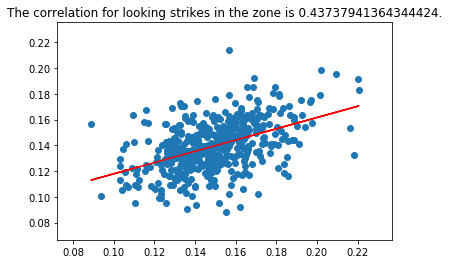

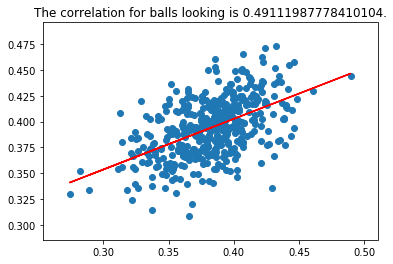

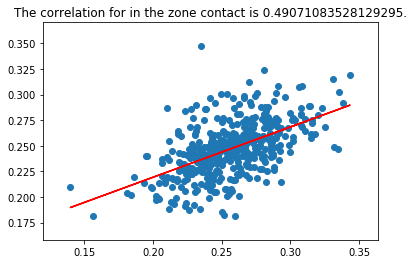

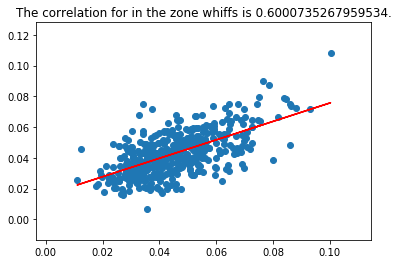

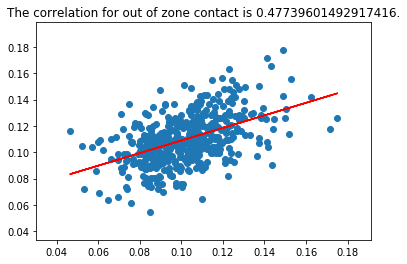

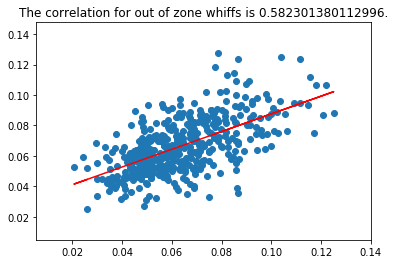

In [30]:
graph = pd.merge(t2017, t2018, on=['playerid'])
plt.figure(0)
plt.scatter(graph.ZLook_x, graph.ZLook_y)
b, m = poly(graph.ZLook_x, graph.ZLook_y, 1)
plt.plot(graph.ZLook_x, b + m * graph.ZLook_x, '-', c='r')
plt.title(f'The correlation for looking strikes in the zone is {m}.')


plt.figure(1)
plt.scatter(graph.OLook_x, graph.OLook_y)
b, m = poly(graph.OLook_x, graph.OLook_y, 1)
plt.plot(graph.OLook_x, b + m * graph.OLook_x, '-', c='r')
plt.title(f'The correlation for balls looking is {m}.')


plt.figure(2)
plt.scatter(graph.ZCon_x, graph.ZCon_y)
b, m = poly(graph.ZCon_x, graph.ZCon_y, 1)
plt.plot(graph.ZCon_x, b + m * graph.ZCon_x, '-', c='r')
plt.title(f'The correlation for in the zone contact is {m}.')


plt.figure(3)
plt.scatter(graph.ZWif_x, graph.ZWif_y)
b, m = poly(graph.ZWif_x, graph.ZWif_y, 1)
plt.plot(graph.ZWif_x, b + m * graph.ZWif_x, '-', c='r')
plt.title(f'The correlation for in the zone whiffs is {m}.')

plt.figure(4)
plt.scatter(graph.OCon_x, graph.OCon_y)
b, m = poly(graph.OCon_x, graph.OCon_y, 1)
plt.plot(graph.OCon_x, b + m * graph.OCon_x, '-', c='r')
plt.title(f'The correlation for out of zone contact is {m}.')

plt.figure(5)
plt.scatter(graph.OWif_x, graph.OWif_y)
b, m = poly(graph.OWif_x, graph.OWif_y, 1)
plt.plot(graph.OWif_x, b + m * graph.OWif_x, '-', c='r')
plt.title(f'The correlation for out of zone whiffs is {m}.')

plt.show()

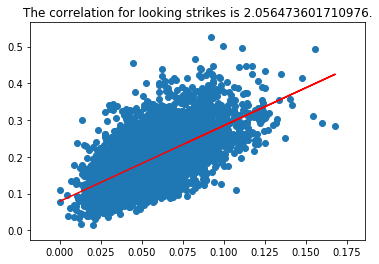

In [34]:
plt.figure(0)
x = total.OWif
y = total['K%']
plt.scatter(x, y)
b, m = poly(x, y, 1)
plt.plot(x, b + m * x, '-', c='r')
plt.title(f'The correlation for looking strikes is {m}.')
plt.show()